In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def filter_region(img, vertices):
    '''
    Filters out a region defined by the vertices.
    '''
    mask = np.zeros_like(img)
    if len(mask.shape)==2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255,)*mask.shape[2])     
    
    return cv2.bitwise_and(img, mask)


def select_region(img):
    '''
    Defines the vertices of the trapezoid 
    of the right side of the frame.
    '''
    imshape = img.shape
    x_cen = (imshape[1] / 2)
    y_cen = imshape[0] / 2
    vertices = np.array([[(x_cen, y_cen+150), 
                          (x_cen, y_cen-50), (imshape[1],0), (imshape[1],imshape[0])]], 
                        dtype=np.int32)
    
    return filter_region(img, vertices)

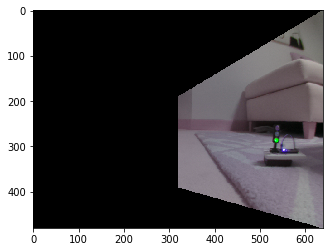

In [20]:
img = cv2.imread("picture15.jpg")
region_image = select_region(img)
plt.imshow(region_image)
plt.show()

Text(0.5,1,'greenMask')

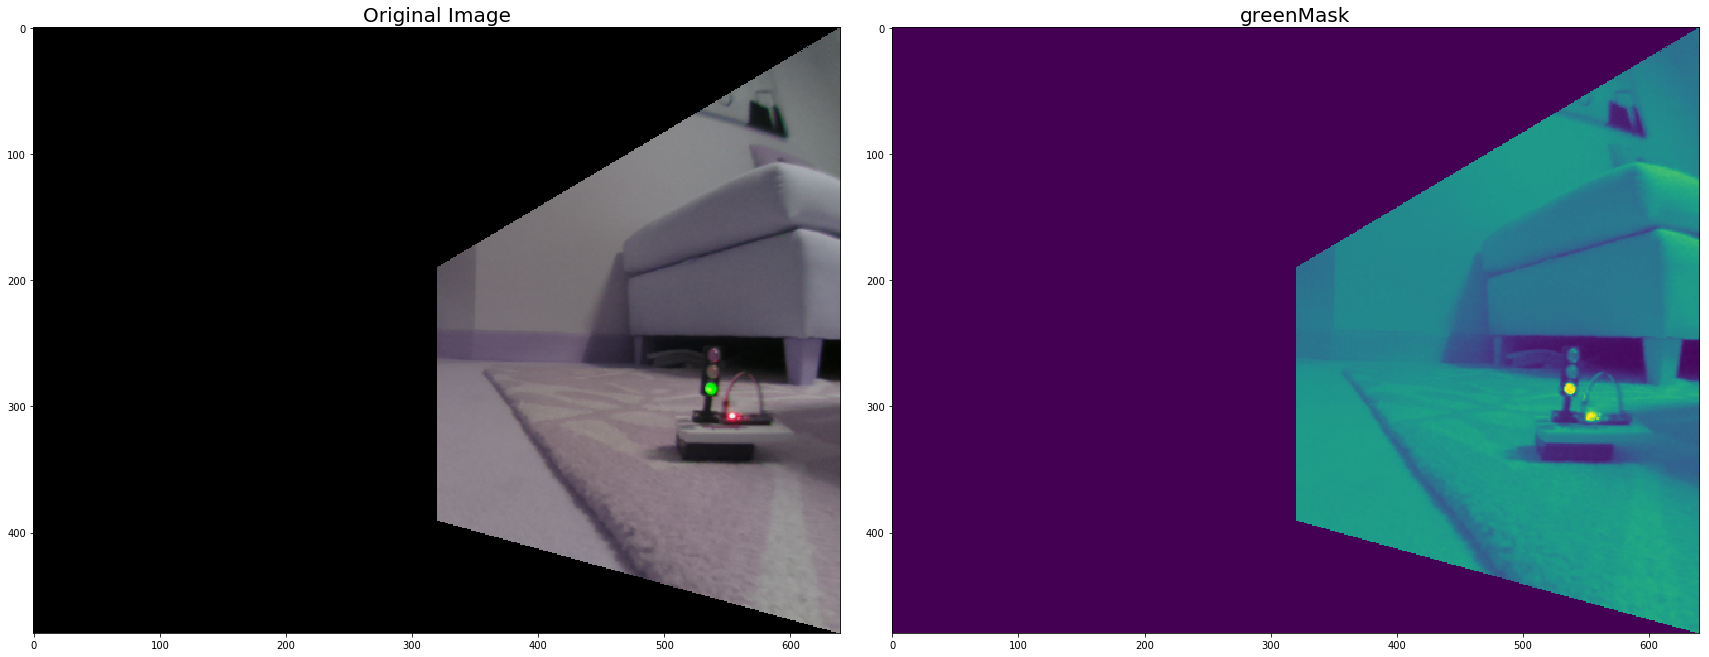

In [21]:
img = region_image
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imgHSV = imgHSV[:, :, 2]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)

ax2.imshow(imgHSV)
ax2.set_title('greenMask', fontsize=20)

In [22]:
def light(rgb_image):
    
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    imgHSV = hsv[:, :, 2]
    
    kernelOpen=np.ones((5,5))
    kernelClose=np.ones((20,20))
    
    traffic_light = [0, 0, 0]
    epsilon = 15
    
    
    ##################################### Light #####################################
    greenMask = cv2.inRange(imgHSV, 240, 255)
    maskClose=cv2.morphologyEx(greenMask, cv2.MORPH_CLOSE, kernelClose)
    maskClose=cv2.morphologyEx(maskClose, cv2.MORPH_OPEN, kernelOpen)
    blackImage = np.zeros((rgb_image.shape[0],rgb_image.shape[1]), np.uint8)
    _, conts, _ = cv2.findContours(maskClose.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(blackImage, conts, -1, (255,255,0), 5)
    
    for i in range(len(conts)):
        x,y,w,h=cv2.boundingRect(conts[i])
        x = x-epsilon
        y = y-epsilon
        w = w+2*epsilon
        h = h+2*epsilon
    
    try:
        cv2.rectangle(rgb_image,(x,y),(x+w,y+h),(255,255,0), 3)
    except:
        x=0
        y=0
        w=0
        h=0

    
    return rgb_image, x, y, w, h

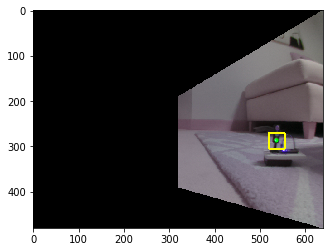

In [23]:
img = region_image
test_image, x, y, w, h = light(img)
plt.imshow(test_image)
plt.show()

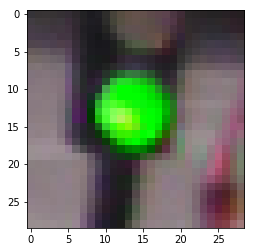

In [24]:
crop_img = cv2.cvtColor(img[y+3:y+h-3, x+3:x+w-3, :], cv2.COLOR_BGR2RGB)
plt.imshow(crop_img)
plt.show()

Text(0.5,1,'Green - mask')

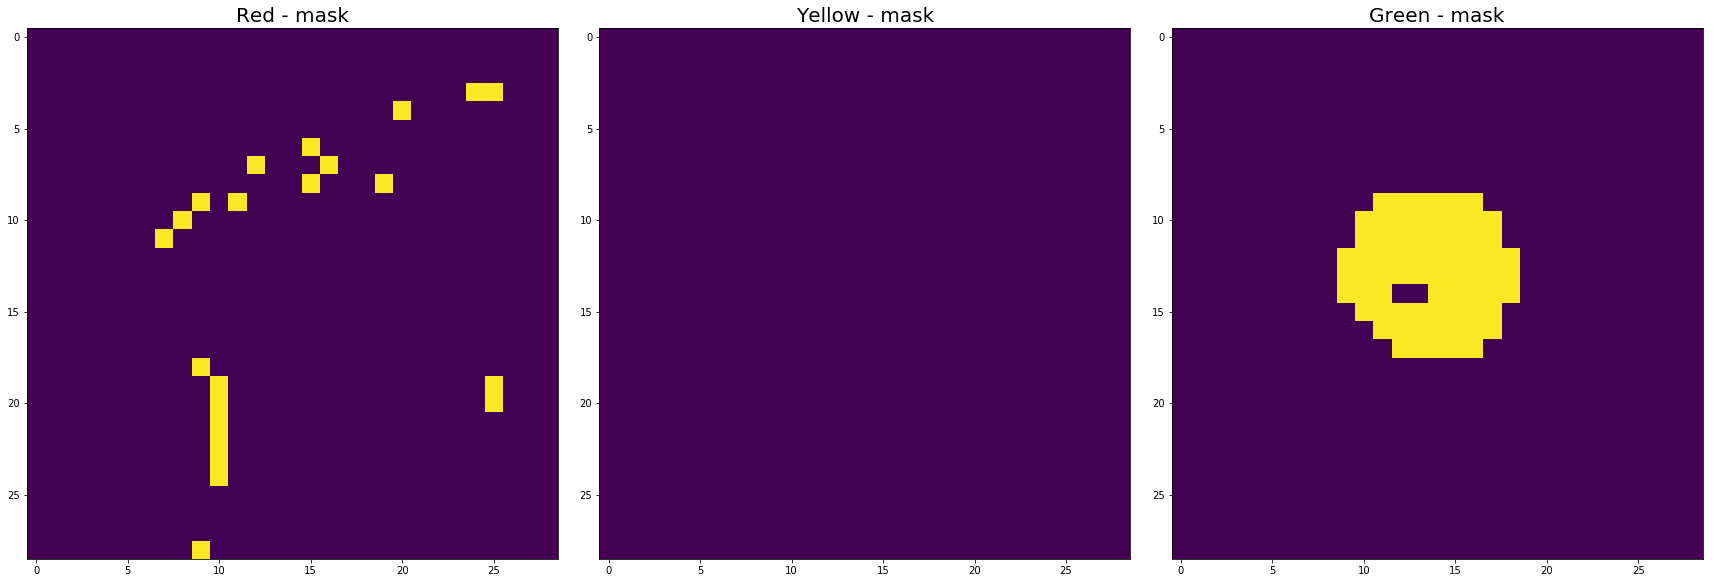

In [25]:
lower_green = np.array([0,150,0])
upper_green = np.array([150,255,255])

lower_red1 = np.array([180, 0, 50])
upper_red1 = np.array([255,200,200])

lower_red2 = np.array([0, 0, 50])
upper_red2 = np.array([50,200,200])

#lower_yellow = np.array([10,sat_low,val_low])
#upper_yellow = np.array([60,255,255])

lower_yellow = np.array([200,200,200])
upper_yellow = np.array([255,255,255])


redMask1 = cv2.inRange(crop_img, lower_red1, upper_red1)
redMask2 = cv2.inRange(crop_img, lower_red2, upper_red2)
redMask = redMask1 + redMask2
greenMask = cv2.inRange(crop_img, lower_green, upper_green)
yellowMask = cv2.inRange(crop_img, lower_yellow, upper_yellow)


redRes = cv2.bitwise_and(crop_img, crop_img, mask=redMask)
greenRes = cv2.bitwise_and(crop_img, crop_img, mask=greenMask)
yellowRes = cv2.bitwise_and(crop_img, crop_img, mask=yellowMask)




f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(redMask)
ax1.set_title('Red - mask', fontsize=20)

ax2.imshow(yellowMask)
ax2.set_title('Yellow - mask', fontsize=20)

ax3.imshow(greenMask)
ax3.set_title('Green - mask', fontsize=20)

Text(0.5,1,'Green - res')

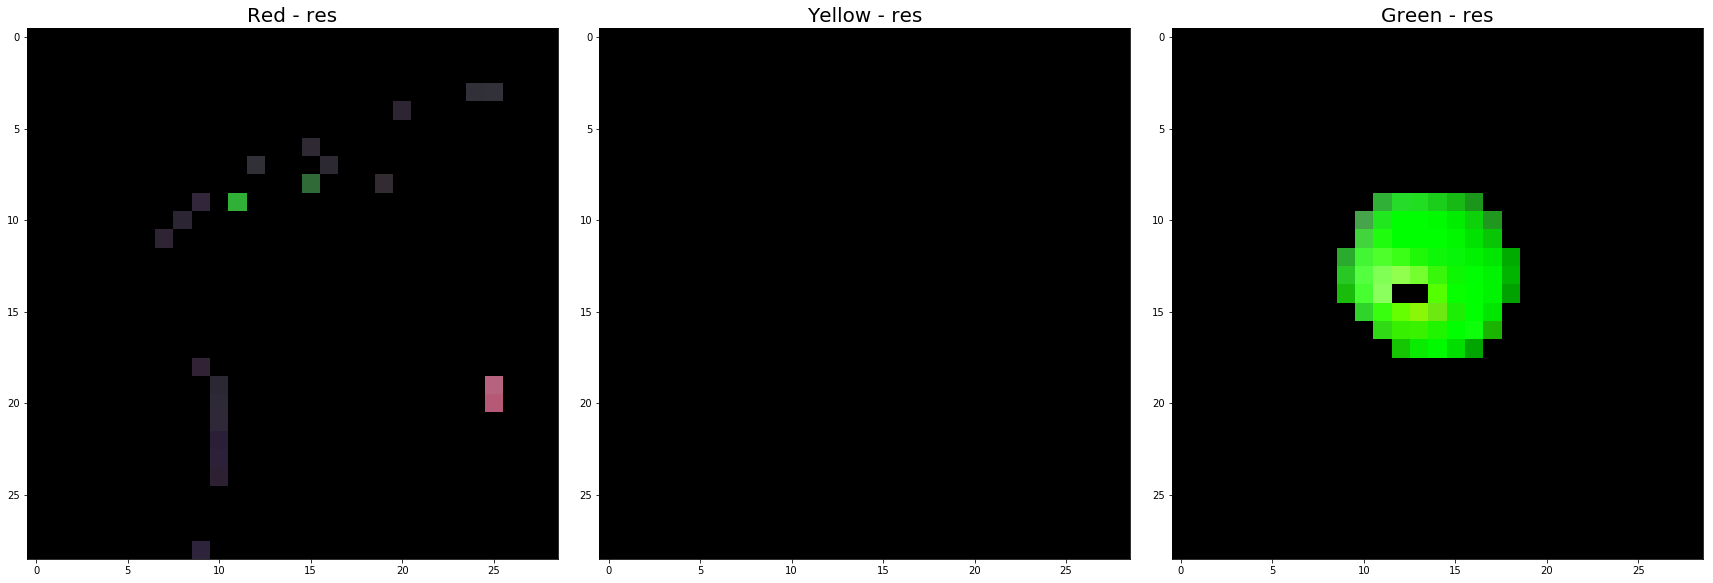

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(redRes)
ax1.set_title('Red - res', fontsize=20)

ax2.imshow(yellowRes)
ax2.set_title('Yellow - res', fontsize=20)

ax3.imshow(greenRes)
ax3.set_title('Green - res', fontsize=20)

In [27]:
redPix = np.sum(redMask)
greenPix = np.sum(greenMask)
yellowPix = np.sum(yellowMask)

print(redPix, yellowPix, greenPix)

5610 0 17850


In [30]:
def red_green_yellow(rgb_image):
    
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    imgHSV = hsv[:, :, 2]
    
    kernelOpen=np.ones((5,5))
    kernelClose=np.ones((20,20))
    
    traffic_light = [0, 0, 0]
    epsilon = 15
    
    
    ##################################### Light #####################################
    greenMask = cv2.inRange(imgHSV, 240, 255)
    maskClose=cv2.morphologyEx(greenMask, cv2.MORPH_CLOSE, kernelClose)
    maskClose=cv2.morphologyEx(maskClose, cv2.MORPH_OPEN, kernelOpen)
    blackImage = np.zeros((rgb_image.shape[0],rgb_image.shape[1]), np.uint8)
    _, conts, _ = cv2.findContours(maskClose.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(blackImage, conts, -1, (255,255,0), 5)
    
    for i in range(len(conts)):
        x,y,w,h=cv2.boundingRect(conts[i])
        x = x-epsilon
        y = y-epsilon
        w = w+2*epsilon
        h = h+2*epsilon
        cv2.rectangle(rgb_image,(x,y),(x+w,y+h),(255,255,0), 3)
        #cv2.cv2.PutText(cv2.fromarray(img), str(i+1),(x,y+h),font,(0,255,255))
    
    crop_img = cv2.cvtColor(rgb_image[y+3:y+h-3, x+3:x+w-3, :], cv2.COLOR_BGR2RGB)
    
    ##################################### Red #####################################
    lower_red1 = np.array([180, 0, 50])
    upper_red1 = np.array([255,200,200])

    lower_red2 = np.array([0, 0, 50])
    upper_red2 = np.array([50,200,200])


    redMask1 = cv2.inRange(crop_img, lower_red1, upper_red1)
    redMask2 = cv2.inRange(crop_img, lower_red2, upper_red2)
    redMask = redMask1 + redMask2

    redRes = cv2.bitwise_and(crop_img, crop_img, mask=redMask)
    
    ##################################### Yellow #####################################
    lower_yellow = np.array([200,200,200])
    upper_yellow = np.array([255,255,255])

    yellowMask = cv2.inRange(crop_img, lower_yellow, upper_yellow)

    yellowRes = cv2.bitwise_and(crop_img, crop_img, mask=yellowMask)    
    
    ##################################### Green #####################################
    lower_green = np.array([0,150,0])
    upper_green = np.array([150,255,255])

    greenMask = cv2.inRange(crop_img, lower_green, upper_green)

    greenRes = cv2.bitwise_and(crop_img, crop_img, mask=greenMask)

    ##################################### Pixel count #####################################
    redPix = np.sum(redMask)
    greenPix = np.sum(greenMask)
    yellowPix = np.sum(yellowMask)
    pix_threshold = 5000
    
    if redPix < pix_threshold:
        redPix = 0
    if yellowPix < pix_threshold:
        yellowPix = 0
    if greenPix < pix_threshold:
        greenPix = 0
    
    
    
    
    if greenPix != 0:
        traffic_light[2] = 1
    elif redPix != 0 and redPix/yellowPix > 0.35:
        traffic_light[0] = 1
    elif yellowPix != 0:
        traffic_light[1] = 1
    
    
    ##################################### Traffic light distance #####################################
    x_dist = x + w/2
    x_max = rgb_image.shape[1]
    x_value = 100* x_dist / x_max
    stop_threshold = 90
    full_threshold = 60
    m = 100 / (full_threshold - stop_threshold)
    q = -m * stop_threshold
    throttle = max(0, min(100, m * x_value + q))
    
        
        
    return rgb_image, traffic_light, throttle

In [31]:
img = cv2.imread("picture15.jpg")
test_image, t_light, throttle = red_green_yellow(img)
plt.imshow(test_image)
plt.show()

print(t_light)
print(throttle)

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/core/src/arithm.cpp:1906: error: (-209) The lower bounary is neither an array of the same size and same type as src, nor a scalar in function inRange
